# MLP - Multilayer Perceptron 

## Carregando os Dados

In [1]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/VOCruz/MLP_Keras/main/train.csv")

dataset.head() 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [2]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## Escolhendo atributos 
* Idade e Salário 

In [5]:
X = dataset.loc[:,['age','hours-per-week']].values
# ou 
# X = dataset.iloc[:,2:4].values
type(X)

y = dataset['income_>50K'].values

print(X[0:6,:])

[[67 60]
 [17 15]
 [31 40]
 [58 40]
 [25 40]
 [59 40]]


## Separando entre conjuntos de treinamento e teste

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 
* A amplitude de variação dos dados nos atributos idade e salário são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos 
* Muitos algoritmos de aprendizado de máquinas são sensíveis a atribuitos com aplitude de valores muito distintos 
* Vídeo com explicações: https://youtu.be/kIeXOC-Rnb4 

In [7]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento

In [8]:
import tensorflow as tf

### Construíndo a estrutra da rede 
* Arquitetura 

In [9]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [10]:
# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Executando o treinamento 

In [12]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
32967/32967 [==============================] - 32s 979us/step - loss: 0.4840 - accuracy: 0.7603
Epoch 2/10
32967/32967 [==============================] - 33s 995us/step - loss: 0.4806 - accuracy: 0.7603
Epoch 3/10
32967/32967 [==============================] - 32s 986us/step - loss: 0.4729 - accuracy: 0.7603
Epoch 4/10
32967/32967 [==============================] - 33s 990us/step - loss: 0.4689 - accuracy: 0.7603
Epoch 5/10
32967/32967 [==============================] - 32s 976us/step - loss: 0.4684 - accuracy: 0.7612
Epoch 6/10
32967/32967 [==============================] - 32s 985us/step - loss: 0.4680 - accuracy: 0.7603
Epoch 7/10
32967/32967 [==============================] - 32s 980us/step - loss: 0.4680 - accuracy: 0.7612
Epoch 8/10
32967/32967 [==============================] - 33s 987us/step - loss: 0.4679 - accuracy: 0.7615
Epoch 9/10
32967/32967 [==============================] - 32s 975us/step - loss: 0.4677 - accuracy: 0.7621
Epoch 10/10
32967/32967 [============

## Avaliando do Modelo

In [13]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
[[3.4506577e-01]
 [3.8425362e-01]
 [3.5288242e-01]
 [1.0135412e-02]
 [2.3855865e-03]
 [1.0135412e-02]
 [3.7778527e-01]
 [5.4387838e-02]
 [5.7722360e-02]
 [2.6198399e-01]
 [4.1970825e-01]
 [1.2733877e-02]
 [1.2733877e-02]
 [3.1023848e-01]
 [2.4701902e-01]
 [1.4389166e-01]
 [3.7276417e-01]
 [5.0741434e-04]
 [2.1885365e-01]
 [3.1023848e-01]
 [1.6968277e-01]
 [3.5288242e-01]
 [3.5484916e-01]
 [4.7325721e-01]
 [3.6475536e-01]
 [3.7276417e-01]
 [5.6729615e-03]
 [2.4073821e-01]
 [3.1305447e-01]
 [1.4298287e-01]
 [2.2921762e-01]
 [5.1623428e-01]
 [3.6300910e-01]
 [3.5879725e-01]
 [3.1833330e-01]]


In [14]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [15]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [16]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [17]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  77.024567788899 %


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[7950  424]
 [2101  515]]


## Visualizando os resultados



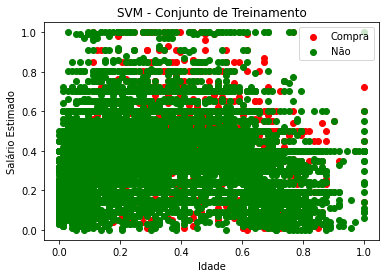

In [19]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

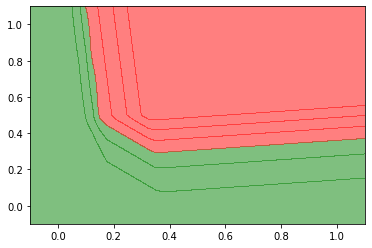

In [20]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

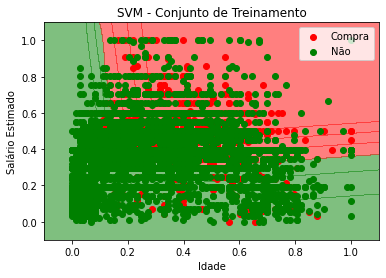

In [21]:
age_neg = X_test[y_test == 0, 0]
salary_neg = X_test[y_test == 0, 1]
age_pos = X_test[y_test == 1, 0]
salary_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

In [22]:
y_pred_mesh[30:35,40:45]

array([[0.52727234, 0.52727234, 0.52727234, 0.52727234, 0.52727234],
       [0.52727234, 0.52727234, 0.52727234, 0.52727234, 0.52727234],
       [0.52727234, 0.52727234, 0.52727234, 0.52727234, 0.52727234],
       [0.52727234, 0.52727234, 0.52727234, 0.52727234, 0.52727234],
       [0.52727234, 0.52727234, 0.52727234, 0.52727234, 0.52727234]],
      dtype=float32)